Import the libraries necessary to analize data

In [30]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
import random
import seaborn as sns
import plotly.express as px

from collections import defaultdict
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
df = pd.read_csv('df_scaled.csv')

In [32]:
column_to_drop = ['date', 'latitude', 'longitude','congressional_district', 'candidatevotes', 'totalvotes', 'total_votes_for_state']
for col in df.columns:
    if df[col].dtype == 'object':
       column_to_drop.append(col)
column_to_drop

['date',
 'latitude',
 'longitude',
 'congressional_district',
 'candidatevotes',
 'totalvotes',
 'total_votes_for_state',
 'date',
 'state',
 'city_or_county',
 'incident_characteristics1',
 'party']

In [33]:
df_categorical = df[column_to_drop]
df_numeric = df.drop(columns=column_to_drop)

In [34]:
df_categorical.info()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197914 entries, 0 to 197913
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       197914 non-null  object 
 1   latitude                   197914 non-null  float64
 2   longitude                  197914 non-null  float64
 3   congressional_district     197914 non-null  int64  
 4   candidatevotes             197914 non-null  int64  
 5   totalvotes                 197914 non-null  int64  
 6   total_votes_for_state      197914 non-null  int64  
 7   date                       197914 non-null  object 
 8   state                      197914 non-null  object 
 9   city_or_county             197914 non-null  object 
 10  incident_characteristics1  197914 non-null  object 
 11  party                      197914 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 18.1+ MB
<class 'pandas.core.frame.Da

# K-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score

Knee Method to estimate the best K

In [ ]:
k_grid = [2]

sse_list = list()

label_list = []
#min_k = 2
#max_k = 1000
dict_sse = {}
#search for the best k
for k in k_grid:

    kmeans = KMeans(n_clusters=k, n_init=11, max_iter=100)
    kmeans.fit(df)
    
    sse = kmeans.inertia_
    labels = kmeans.labels_

    dict_sse[f'{k}_sse'] = sse
    dict_sse[f'{k}_labels'] = labels

In [ ]:
for k in k_grid:
    print(f'for k = {k}')
    print('SSE %s' % dict_sse[f'{k}_sse']) # cohesion, lower value better clustering (error minimization)
    print('Separation %s' % metrics.davies_bouldin_score(df, dict_sse[f'{k}_labels'])) # lower value, better clustering (minimum zero)
    print('Silhouette %s' % silhouette_score(df, dict_sse[f'{k}_labels']))

for k = 2
SSE 16921.5832642
Separation 0.7281075678917921
Silhouette 0.5753625013213346


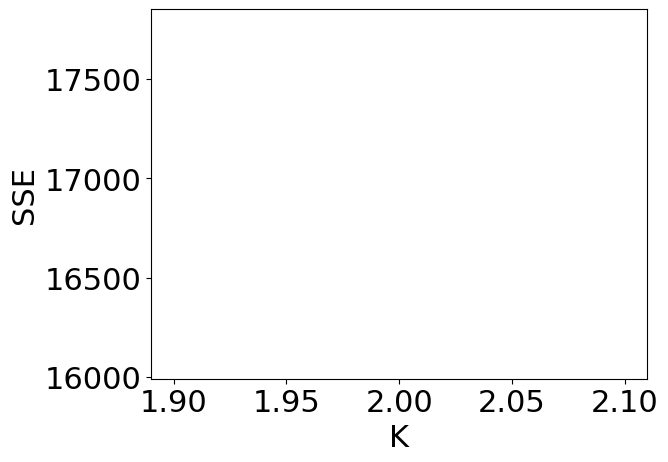

In [ ]:
sse_list = [dict_sse[f'{k}_sse'] for k in k_grid]
plt.plot(k_grid, sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()